# Ellipsoidal nested rejection sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data. For a tutorial on nested sampling, see: [INSERT LINK to NESTED SAMPLING TUTORIAL NOTEBOOK].

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

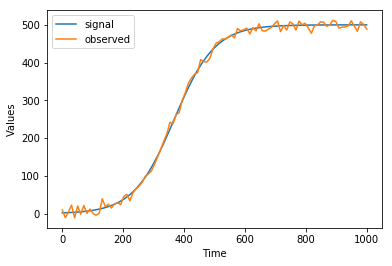

In [1]:
import os
os.chdir('C:/Users/bclamber/Desktop/AllPints/pints3/pints/')
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedEllipsoidSampler(log_likelihood, log_prior)

# Set number of iterations
sampler.set_iterations(2000)

# Set enlargement factor (a value of 1 means uniformly sample from the minimum volume 
# ellipsoid around sampled points, whereas > 1 widens the sampling volume)
sampler.set_enlargement_factor(1.25)

# Set number of initial rejection samples (before ellipsoidal sampling begins)
sampler.set_rejection_samples(200)

# Set the number of posterior samples to generate
sampler.set_posterior_samples(400)

# Set gaps between updating ellipsoid
sampler.set_ellipsoid_update_gap(100)

# Set the number of active points
sampler.set_active_points_rate(400)

Run the sampler!

In [3]:
samples, marginal_log_likelihood = sampler.run()
print('Done!')

Running nested rejection sampling
Number of active points: 400
Total number of iterations: 2000
Enlargement factor: 1.25
Total number of posterior samples: 400
Iter. Eval. Time m:s
0     1       0:00.0
0     2       0:00.0
0     3       0:00.0
0     4       0:00.0
0     5       0:00.0
0     21      0:00.0
0     41      0:00.0
0     61      0:00.0
0     81      0:00.0
0     101     0:00.0
0     121     0:00.0
0     141     0:00.0
0     161     0:00.0
0     181     0:00.0
0     201     0:00.0
0     221     0:00.0
0     241     0:00.0
0     261     0:00.0
0     281     0:00.0
0     301     0:00.0
0     321     0:00.0
0     341     0:00.0
0     361     0:00.0
0     381     0:00.0
400   401     0:00.0
420   422     0:00.0
440   444     0:00.0
460   466     0:00.0
480   489     0:00.0
500   512     0:00.0
520   538     0:00.1
540   564     0:00.1
560   596     0:00.1
580   622     0:00.1
[[  3.56688896e+04   3.10411164e-01   1.59999115e+00]
 [  3.10411164e-01   6.42922750e-05   1.42647140e-0

[[  8.55186733e+05   9.86785581e+00   7.52076928e-01]
 [  9.86785581e+00   1.20306592e-03   1.22158579e-05]
 [  7.52076928e-01   1.22158579e-05   4.29100028e-03]]
[  1.49574549e-02   4.98371785e+02   2.04637370e+01]
[[  8.55186733e+05   9.86785581e+00   7.52076928e-01]
 [  9.86785581e+00   1.20306592e-03   1.22158579e-05]
 [  7.52076928e-01   1.22158579e-05   4.29100028e-03]]
[  1.49574549e-02   4.98371785e+02   2.04637370e+01]
Done!


In [3]:
samples, marginal_log_likelihood = sampler.run()
print('Done!')

Running nested rejection sampling
Number of active points: 400
Total number of iterations: 2000
Enlargement factor: 1.25
Total number of posterior samples: 400
Iter. Eval. Time m:s
0     1       0:00.0
0     2       0:00.0
0     3       0:00.0
0     4       0:00.0
0     5       0:00.0
0     21      0:00.0
0     41      0:00.0
0     61      0:00.0
0     81      0:00.0
0     101     0:00.0
0     121     0:00.0
0     141     0:00.0
0     161     0:00.0
0     181     0:00.0
0     201     0:00.0
0     221     0:00.0
0     241     0:00.0
0     261     0:00.0
0     281     0:00.0
0     301     0:00.0
0     321     0:00.0
0     341     0:00.0
0     361     0:00.0
0     381     0:00.0
400   401     0:00.0
420   421     0:00.0
440   446     0:00.0
460   468     0:00.0
480   495     0:00.0
500   523     0:00.0
520   552     0:00.1
540   578     0:00.1
560   606     0:00.1
580   637     0:00.1
[[  2.10911664e+04   2.57942937e-01   3.93976441e-01]
 [  2.57942937e-01   4.16710827e-05   2.99197780e-0

C:\Users\bclamber\Desktop\AllPints\pints3\pints\pints\_log_likelihoods.py:154: RuntimeWarning: invalid value encountered in log
  - np.sum(error**2, axis=0) / (2 * sigma**2))



[  1.66059292e-02   5.21491896e+02   1.19361483e+01]
-882.231946447
[  1.34684090e-02   5.74931604e+02   1.11207204e+01]
-1405.77735732
[  1.56127827e-02   4.15206201e+02   1.18768748e+01]
-1559.51533236
[  1.99317608e-02   5.20338997e+02   2.23845459e+01]
-1124.75251861
[  1.67048248e-02   5.23948641e+02   1.57872192e+01]
-723.803258845
[  2.19412467e-02   4.48794687e+02   2.09847077e+01]
-1259.64781651
[  1.28987222e-02   4.56473638e+02   2.35584985e+01]
-761.949458783
820   1242    0:00.4
[  1.38302190e-02   5.06393836e+02   1.90879454e+01]
-475.92160965
[  1.46159457e-02   4.32358291e+02   1.62345610e+01]
-877.813484818
[  1.71440613e-02   5.18221949e+02   1.69736384e+01]
-741.376887065
[  1.93817299e-02   4.23775879e+02   1.73177841e+01]
-1180.72470314
[  1.51780758e-02   4.03551140e+02   2.07422163e+01]
-941.844078276
[  1.44746690e-02   4.93599982e+02   6.56254414e+00]
-576.45835404
[  1.59185915e-02   5.12575095e+02   1.03457834e+01]
-597.216475336
[  1.77854097e-02   4.436165

-608.609976862
[  1.85565639e-02   4.44643844e+02   3.22893554e+01]
-592.291682608
[  1.70505007e-02   4.67005200e+02   3.92720962e+01]
-499.928423055
[  1.75349161e-02   5.41935567e+02   2.10472122e+01]
-865.075133999
[  1.71145232e-02   4.90621205e+02   1.13452762e+01]
-838.775480885
[  1.75007261e-02   3.83501276e+02   2.97458746e+01]
-804.17535408
[  1.80025679e-02   3.96518450e+02   3.06225077e+01]
-729.638595861
[  1.44626089e-02   5.02900909e+02   1.54046601e+01]
-407.73574026
[  1.75628784e-02   5.00610486e+02   2.40742710e+01]
-586.790732494
[  1.61185244e-02   4.62006010e+02   2.61911066e+01]
-477.820763427
1140  2153    0:00.8
[  1.38738181e-02   4.82289012e+02   1.39614883e+01]
-609.41499178
[  1.72250742e-02   4.53603291e+02   2.58870839e+01]
-543.61135437
[  1.88759608e-02   5.15787049e+02   3.01958003e+01]
-698.619569515
[  1.68084125e-02   5.33086050e+02   3.33851335e+01]
-549.38579778
[  1.30030634e-02   4.85396209e+02   3.21424764e+01]
-553.846155039
[  1.73982979e-02

[  1.50153958e-02   4.30063594e+02   4.72936691e+01]
-534.46100918
[  1.59503162e-02   4.62187849e+02   2.01333033e+01]
-485.60239328
[  1.50108750e-02   4.99378411e+02   7.67474904e+01]
-526.653374025
[  1.66114644e-02   4.95337438e+02   5.32594987e+01]
-504.39857908
[  1.77177317e-02   4.82793326e+02   3.93646727e+01]
-520.672185778
[  1.44539931e-02   5.20849297e+02   5.26136832e+01]
-494.10817762
[  1.30705407e-02   5.66462663e+02   6.19373738e+01]
-538.671350479
[  1.59686254e-02   4.50405416e+02   5.90466828e+01]
-516.814789674
[  1.53115786e-02   4.52002381e+02   3.91654905e+01]
-495.568752736
[  1.59275840e-02   5.30142560e+02   7.77715153e+01]
-536.932190467
[  1.72050208e-02   4.51129357e+02   5.51314149e+01]
-521.693008753
1620  3442    0:01.5
[  1.72931508e-02   5.15408498e+02   7.17451593e+01]
-540.577314128
[  1.71048705e-02   4.91204348e+02   7.78307858e+01]
-538.031630379
[  1.61205914e-02   4.49211717e+02   6.62252314e+01]
-525.727673863
[  1.46731340e-02   4.77665631e

[  1.42302412e-02   5.06624364e+02   3.81691374e+01]
-467.054056237
[  1.59606002e-02   5.16631983e+02   2.75624174e+01]
-470.913224186
2240  5282    0:02.4
[  1.43499568e-02   4.83326156e+02   1.84276692e+01]
-457.571294241
[  1.52069867e-02   4.79919911e+02   2.19593832e+01]
-426.684128405
[  1.53139888e-02   4.98799530e+02   2.69533276e+01]
-429.012071485
[  1.51385126e-02   4.71471098e+02   4.07766650e+01]
-476.223058275
[  1.57927577e-02   4.75929007e+02   2.97673881e+01]
-453.34814629
[  1.45800055e-02   5.33858531e+02   3.66020362e+01]
-474.591025914
[  1.61541886e-02   5.12243450e+02   3.25519032e+01]
-476.237376831
[  1.58587489e-02   4.61726995e+02   2.74135210e+01]
-472.940982617
[  1.54547011e-02   4.82515603e+02   1.92909694e+01]
-417.414782812
[  1.50480241e-02   4.87141300e+02   2.23756188e+01]
-418.060683327
[  1.46092493e-02   4.97643310e+02   3.80208249e+01]
-461.32127428
[  1.56737106e-02   4.68984001e+02   2.75263492e+01]
-457.144733896
[  1.48217747e-02   4.7462985

In [5]:
samples

array([[  1.49492750e-02,   5.00682400e+02,   9.17182443e+00],
       [  1.49492750e-02,   5.00682400e+02,   9.17182443e+00],
       [  1.49492750e-02,   5.00682400e+02,   9.17182443e+00],
       ..., 
       [  1.49492750e-02,   5.00682400e+02,   9.17182443e+00],
       [  1.49492750e-02,   5.00682400e+02,   9.17182443e+00],
       [  1.49492750e-02,   5.00682400e+02,   9.17182443e+00]])

## Plot posterior samples versus true parameter values (dashed lines)

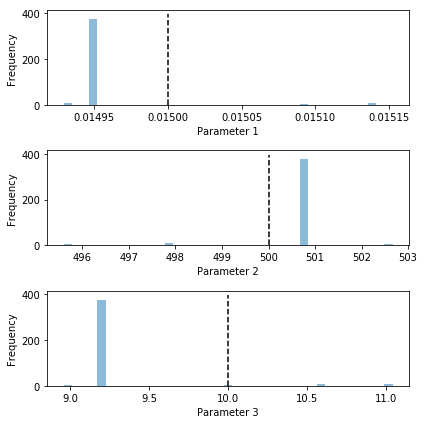

In [6]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

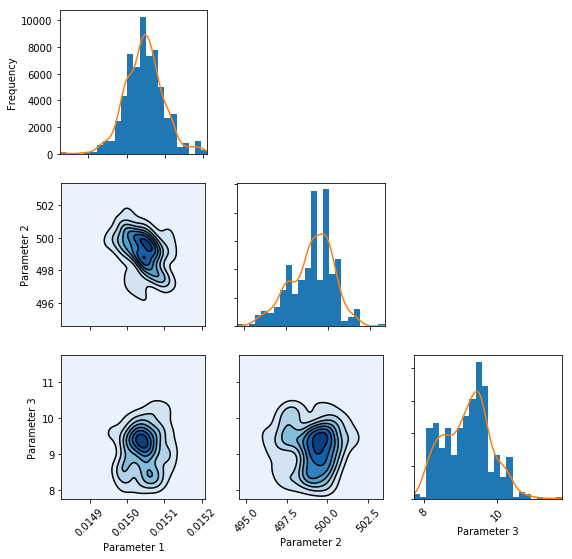

In [10]:
vTheta = samples[0]
pints.plot.pairwise(samples, kde=True)

plt.show()

## Plot posterior predictive simulations versus the observed data

In [ ]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [ ]:
print('marginal log-likelihood = ' + str(marginal_log_likelihood))